# 📊 Data Exploration - Forex Training Data

**Purpose:** Өгөгдлийг судлах, ойлгох, асуудал олох  
**Data Source:** `data/train/` болон `data/test/`  
**Currency Pairs:** EUR_USD, GBP_USD, USD_JPY, USD_CAD, USD_CHF, XAU_USD

---


## 📦 1. Imports


In [25]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Custom modules
from backend.ml.preprocessing.data_loader import ForexDataLoader

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (15, 6)

print("✅ Imports complete")
print(f"📅 Analysis Date: October 22, 2025")

✅ Imports complete
📅 Analysis Date: October 22, 2025


## 📂 2. Data Overview


In [2]:
# Initialize data loader
loader = ForexDataLoader(data_dir='../data')

# Get data information
info = loader.get_data_info()

print("="*60)
print("📊 AVAILABLE FOREX DATA")
print("="*60)

print("\n🎓 TRAINING DATA:")
print("-" * 60)
for file_info in info['train_files']:
    print(f"  {file_info['pair']:12} | {file_info['file']:25} | {file_info['size_mb']:8.2f} MB")
print("-" * 60)
print(f"  {'TOTAL':12} | {'':<25} | {info['total_train_size']:8.2f} MB")

print("\n🧪 TEST DATA:")
print("-" * 60)
for file_info in info['test_files']:
    print(f"  {file_info['pair']:12} | {file_info['file']:25} | {file_info['size_mb']:8.2f} MB")
print("-" * 60)
print(f"  {'TOTAL':12} | {'':<25} | {info['total_test_size']:8.2f} MB")
print("\n" + "="*60)

📊 AVAILABLE FOREX DATA

🎓 TRAINING DATA:
------------------------------------------------------------
  EUR_USD      | EUR_USD_1min.csv          |   115.10 MB
  GBP_USD      | GBP_USD_1min.csv          |   114.66 MB
  USD_JPY      | USD_JPY_1min.csv          |   115.18 MB
  USD_CAD      | USD_CAD_1min.csv          |   114.14 MB
  USD_CHF      | USD_CHF_1min.csv          |   113.47 MB
  XAU_USD      | XAU_USD_1min.csv          |   119.72 MB
------------------------------------------------------------
  TOTAL        |                           |   692.27 MB

🧪 TEST DATA:
------------------------------------------------------------
  EUR_USD      | EUR_USD_test.csv          |    18.30 MB
  GBP_USD      | GBP_USD_test.csv          |    18.17 MB
  USD_JPY      | USD_JPY_test.csv          |    18.33 MB
  USD_CAD      | USD_CAD_test.csv          |    18.27 MB
  USD_CHF      | USD_CHF_test.csv          |    18.18 MB
  XAU_USD      | XAU_USD_test.csv          |    19.10 MB
---------------------

## 📈 3. Load Sample Data - EUR/USD


In [3]:
# Load EUR_USD with sample size for exploration
print("📥 Loading EUR_USD training data (first 100,000 rows for quick analysis)...\n")

df = loader.load_train_data('EUR_USD', nrows=100000)

print(f"\n📊 Data Shape: {df.shape}")
print(f"📅 Date Range: {df.index.min()} to {df.index.max()}")
print(f"⏱️  Duration: {(df.index.max() - df.index.min()).days} days")
print(f"\n🔍 Columns: {df.columns.tolist()}")

INFO:backend.ml.preprocessing.data_loader:📥 Loading EUR_USD training data...


📥 Loading EUR_USD training data (first 100,000 rows for quick analysis)...



INFO:backend.ml.preprocessing.data_loader:✅ Loaded 100,000 rows
INFO:backend.ml.preprocessing.data_loader:📅 Date range: 2019-12-31 16:00:00+00:00 to 2020-04-08 04:20:00+00:00
INFO:backend.ml.preprocessing.data_loader:📅 Date range: 2019-12-31 16:00:00+00:00 to 2020-04-08 04:20:00+00:00



📊 Data Shape: (100000, 5)
📅 Date Range: 2019-12-31 16:00:00+00:00 to 2020-04-08 04:20:00+00:00
⏱️  Duration: 98 days

🔍 Columns: ['open', 'high', 'low', 'close', 'volume']


## 🔍 4. Basic Data Inspection


In [4]:
# First few rows
print("📋 First 10 rows:")
display(df.head(10))

📋 First 10 rows:


,open,high,low,close,volume
timestamp,,,,,
2019-12-31 16:00:00+00:00,1.12237,1.12287,1.12225,1.12279,697.06
2019-12-31 16:01:00+00:00,1.12277,1.12278,1.12226,1.12231,442.42
2019-12-31 16:02:00+00:00,1.12231,1.12249,1.12222,1.12236,382.16
2019-12-31 16:03:00+00:00,1.12235,1.12248,1.12222,1.12225,242.60
2019-12-31 16:04:00+00:00,1.12225,1.12225,1.12200,1.12209,281.48
2019-12-31 16:05:00+00:00,1.12208,1.12218,1.12203,1.12205,228.15
2019-12-31 16:06:00+00:00,1.12203,1.12207,1.12194,1.12206,169.35
2019-12-31 16:07:00+00:00,1.12207,1.12207,1.12175,1.12181,238.41
2019-12-31 16:08:00+00:00,1.12181,1.12198,1.12181,1.12197,268.61


In [5]:
# Last few rows
print("📋 Last 10 rows:")
display(df.tail(10))

📋 Last 10 rows:


,open,high,low,close,volume
timestamp,,,,,
2020-04-08 04:11:00+00:00,1.08630,1.08642,1.08630,1.08642,62.49
2020-04-08 04:12:00+00:00,1.08642,1.08649,1.08638,1.08647,136.78
2020-04-08 04:13:00+00:00,1.08646,1.08649,1.08646,1.08649,59.21
2020-04-08 04:14:00+00:00,1.08649,1.08656,1.08648,1.08648,143.58
2020-04-08 04:15:00+00:00,1.08650,1.08662,1.08648,1.08662,214.35
2020-04-08 04:16:00+00:00,1.08662,1.08680,1.08660,1.08675,178.28
2020-04-08 04:17:00+00:00,1.08676,1.08690,1.08673,1.08686,173.59
2020-04-08 04:18:00+00:00,1.08687,1.08690,1.08682,1.08687,149.59
2020-04-08 04:19:00+00:00,1.08688,1.08688,1.08677,1.08678,88.28


In [6]:
# Data info
print("ℹ️  DataFrame Info:")
df.info()

ℹ️  DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2019-12-31 16:00:00+00:00 to 2020-04-08 04:20:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    100000 non-null  float64
 1   high    100000 non-null  float64
 2   low     100000 non-null  float64
 3   close   100000 non-null  float64
 4   volume  100000 non-null  float64
dtypes: float64(5)
memory usage: 4.6 MB


In [7]:
# Check for missing values
print("🔍 Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("  ✅ No missing values found!")
else:
    print(missing[missing > 0])
    print(f"\n  Total missing: {missing.sum()} ({missing.sum() / len(df) * 100:.2f}%)")

🔍 Missing Values:
  ✅ No missing values found!
  ✅ No missing values found!


In [8]:
# Check for duplicates
duplicates = df.index.duplicated().sum()
print(f"🔍 Duplicate timestamps: {duplicates}")
if duplicates > 0:
    print(f"  ⚠️  Warning: {duplicates} duplicate rows found")
else:
    print("  ✅ No duplicates")

🔍 Duplicate timestamps: 0
  ✅ No duplicates


## 📊 5. Statistical Summary


In [9]:
# Descriptive statistics
print("📈 Statistical Summary:")
display(df.describe())

📈 Statistical Summary:



,open,high,low,close,volume
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.101750,1.101847,1.101653,1.101749,142.722024
std,0.015695,0.015695,0.015695,0.015695,504.484750
min,1.063810,1.064010,1.063570,1.063800,0.010000
25%,1.087980,1.088060,1.087900,1.087980,42.840000
50%,1.102790,1.102850,1.102710,1.102780,98.830000
75%,1.113040,1.113110,1.112970,1.113040,189.790000
max,1.148340,1.149540,1.148060,1.148330,97254.490000


In [10]:
# Price statistics
print("💰 PRICE STATISTICS")
print("=" * 50)
print(f"Open  - Min: {df['open'].min():.5f}  | Max: {df['open'].max():.5f}  | Mean: {df['open'].mean():.5f}")
print(f"High  - Min: {df['high'].min():.5f}  | Max: {df['high'].max():.5f}  | Mean: {df['high'].mean():.5f}")
print(f"Low   - Min: {df['low'].min():.5f}  | Max: {df['low'].max():.5f}  | Mean: {df['low'].mean():.5f}")
print(f"Close - Min: {df['close'].min():.5f}  | Max: {df['close'].max():.5f}  | Mean: {df['close'].mean():.5f}")
print("=" * 50)

# Calculate price range
price_range = df['high'] - df['low']
print(f"\n📏 Candle Range (High-Low):")
print(f"  Min: {price_range.min():.5f}")
print(f"  Max: {price_range.max():.5f}")
print(f"  Mean: {price_range.mean():.5f}")
print(f"  Median: {price_range.median():.5f}")

💰 PRICE STATISTICS
Open  - Min: 1.06381  | Max: 1.14834  | Mean: 1.10175
High  - Min: 1.06401  | Max: 1.14954  | Mean: 1.10185
Low   - Min: 1.06357  | Max: 1.14806  | Mean: 1.10165
Close - Min: 1.06380  | Max: 1.14833  | Mean: 1.10175

📏 Candle Range (High-Low):
  Min: 0.00000
  Max: 0.00801
  Mean: 0.00019
  Median: 0.00012


In [12]:
# Volume statistics
print("📊 VOLUME STATISTICS")
print("=" * 50)

# Check which volume column exists
volume_col = None
if 'tick_volume' in df.columns:
    volume_col = 'tick_volume'
elif 'volume' in df.columns:
    volume_col = 'volume'
elif 'real_volume' in df.columns:
    volume_col = 'real_volume'

if volume_col:
    print(f"Using column: {volume_col}")
    print(f"Total Volume: {df[volume_col].sum():,.0f}")
    print(f"Mean Volume:  {df[volume_col].mean():.2f}")
    print(f"Median Volume: {df[volume_col].median():.2f}")
    print(f"Max Volume:   {df[volume_col].max():,.0f}")
    print(f"Min Volume:   {df[volume_col].min():,.0f}")
else:
    print("⚠️  No volume column found in dataset")
    print(f"Available columns: {df.columns.tolist()}")
print("=" * 50)

📊 VOLUME STATISTICS
Using column: volume
Total Volume: 14,272,202
Mean Volume:  142.72
Median Volume: 98.83
Max Volume:   97,254
Min Volume:   0


## 📈 6. Price Visualization


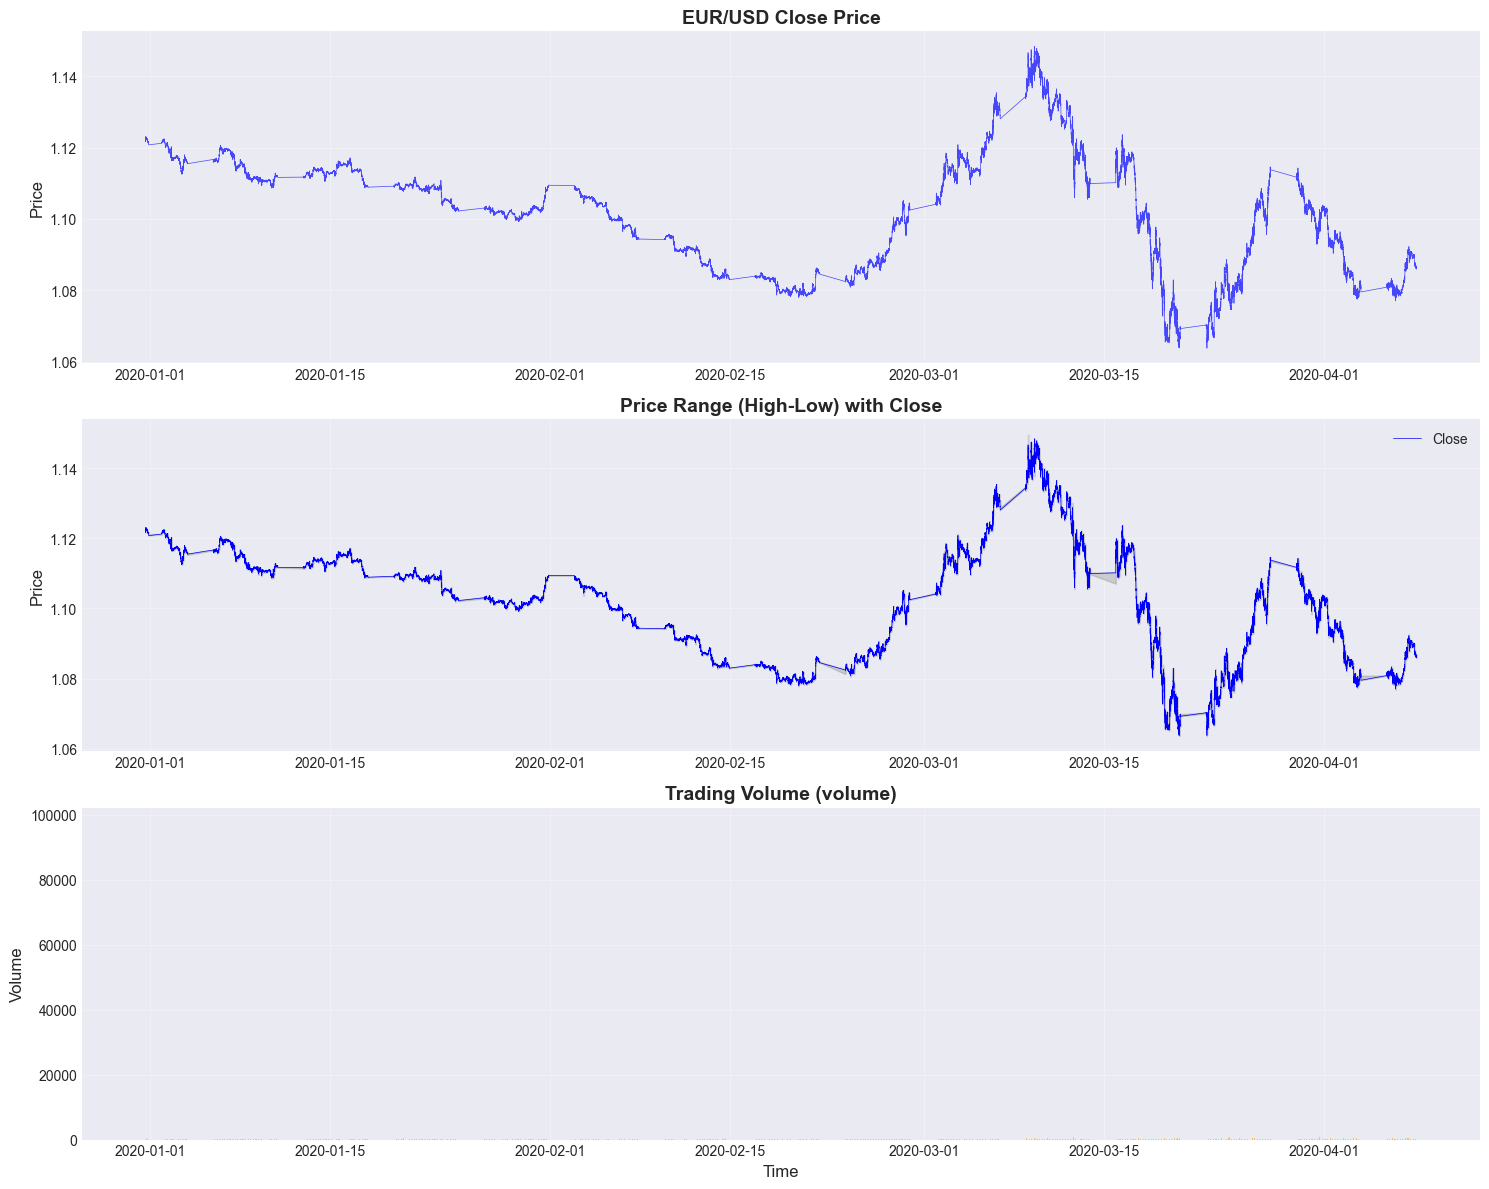

In [13]:
# Plot price over time
# Determine volume column
volume_col = 'tick_volume' if 'tick_volume' in df.columns else ('volume' if 'volume' in df.columns else None)

if volume_col:
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    
    # Close price
    axes[0].plot(df.index, df['close'], linewidth=0.5, color='blue', alpha=0.7)
    axes[0].set_title('EUR/USD Close Price', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Price', fontsize=12)
    axes[0].grid(True, alpha=0.3)
    
    # High-Low range
    axes[1].fill_between(df.index, df['low'], df['high'], alpha=0.3, color='gray')
    axes[1].plot(df.index, df['close'], linewidth=0.5, color='blue', label='Close')
    axes[1].set_title('Price Range (High-Low) with Close', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Price', fontsize=12)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Volume
    axes[2].bar(df.index, df[volume_col], width=0.0003, color='orange', alpha=0.6)
    axes[2].set_title(f'Trading Volume ({volume_col})', fontsize=14, fontweight='bold')
    axes[2].set_ylabel('Volume', fontsize=12)
    axes[2].set_xlabel('Time', fontsize=12)
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    # Plot without volume
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    
    # Close price
    axes[0].plot(df.index, df['close'], linewidth=0.5, color='blue', alpha=0.7)
    axes[0].set_title('EUR/USD Close Price', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Price', fontsize=12)
    axes[0].grid(True, alpha=0.3)
    
    # High-Low range
    axes[1].fill_between(df.index, df['low'], df['high'], alpha=0.3, color='gray')
    axes[1].plot(df.index, df['close'], linewidth=0.5, color='blue', label='Close')
    axes[1].set_title('Price Range (High-Low) with Close', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Price', fontsize=12)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    print("ℹ️  Volume data not available for visualization")

## 📊 7. Returns Analysis


In [14]:
# Calculate returns
df['returns'] = df['close'].pct_change()
df['log_returns'] = np.log(df['close'] / df['close'].shift(1))

print("📈 RETURNS ANALYSIS")
print("=" * 50)
print(f"Mean Return:     {df['returns'].mean():.8f} ({df['returns'].mean() * 100:.4f}%)")
print(f"Std Deviation:   {df['returns'].std():.8f} ({df['returns'].std() * 100:.4f}%)")
print(f"Min Return:      {df['returns'].min():.8f} ({df['returns'].min() * 100:.4f}%)")
print(f"Max Return:      {df['returns'].max():.8f} ({df['returns'].max() * 100:.4f}%)")
print(f"Skewness:        {df['returns'].skew():.4f}")
print(f"Kurtosis:        {df['returns'].kurtosis():.4f}")
print("=" * 50)

# Volatility
volatility_20 = df['returns'].rolling(20).std()
print(f"\n📊 20-Period Rolling Volatility:")
print(f"  Mean: {volatility_20.mean() * 100:.4f}%")
print(f"  Max:  {volatility_20.max() * 100:.4f}%")

📈 RETURNS ANALYSIS
Mean Return:     -0.00000031 (-0.0000%)
Std Deviation:   0.00017730 (0.0177%)
Min Return:      -0.00338661 (-0.3387%)
Max Return:      0.00584246 (0.5842%)
Skewness:        1.0841
Kurtosis:        49.9820

📊 20-Period Rolling Volatility:
  Mean: 0.0130%
  Max:  0.1560%


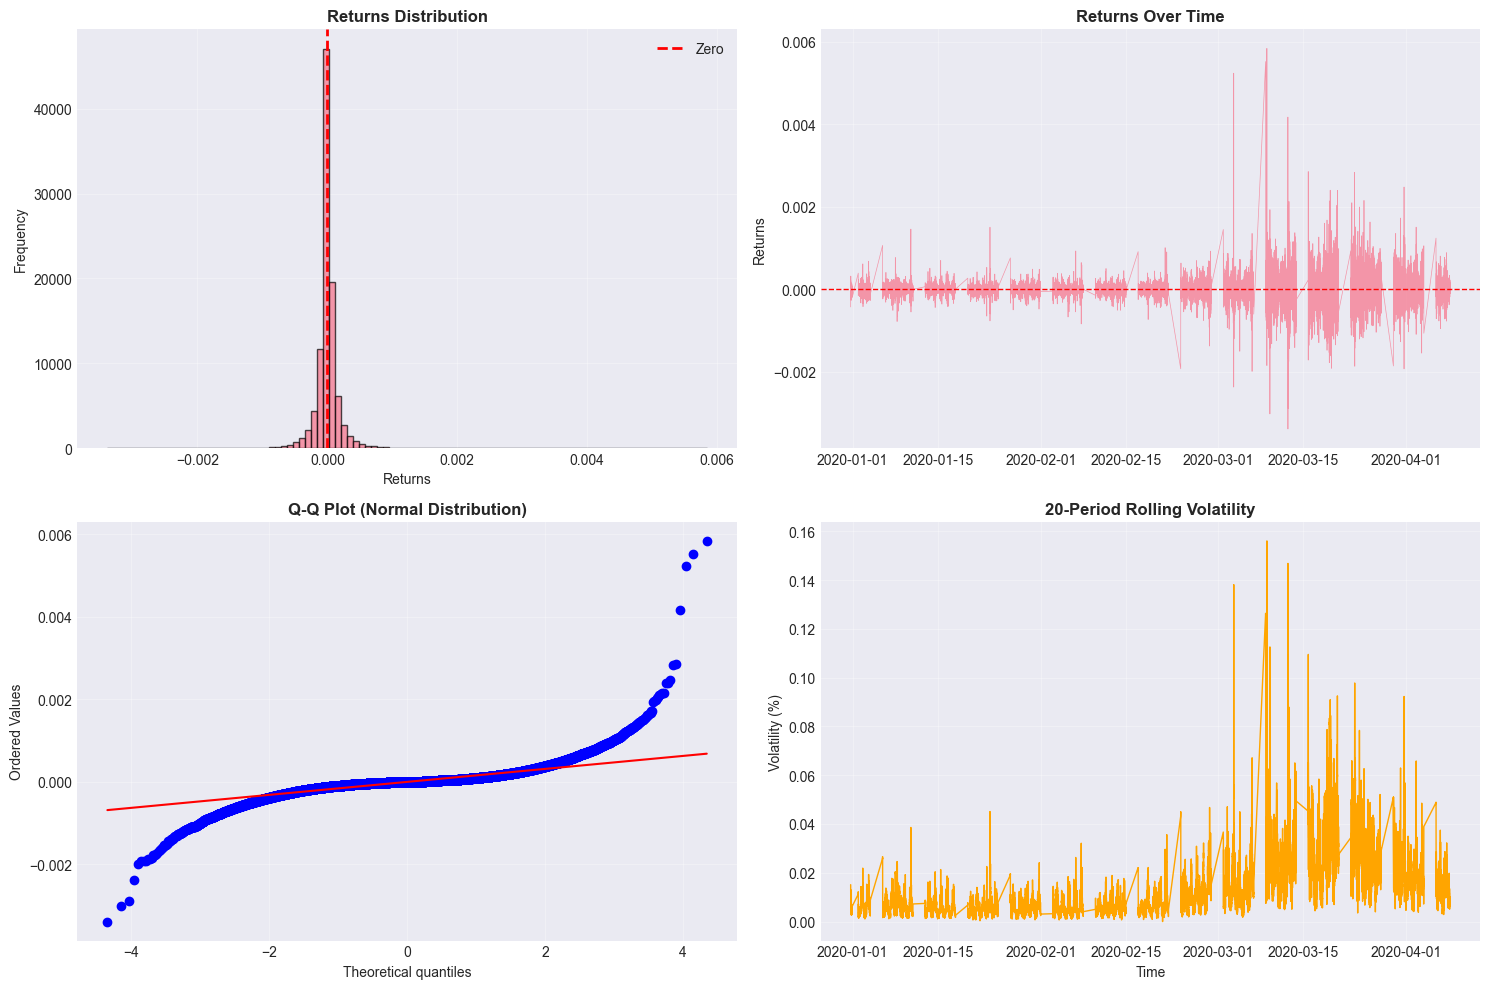

In [15]:
# Visualize returns distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Returns histogram
axes[0, 0].hist(df['returns'].dropna(), bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Returns Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Returns')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Returns over time
axes[0, 1].plot(df.index, df['returns'], linewidth=0.5, alpha=0.7)
axes[0, 1].set_title('Returns Over Time', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Returns')
axes[0, 1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0, 1].grid(True, alpha=0.3)

# Q-Q Plot
from scipy import stats
stats.probplot(df['returns'].dropna(), dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normal Distribution)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Rolling volatility
axes[1, 1].plot(df.index, volatility_20 * 100, linewidth=1, color='orange')
axes[1, 1].set_title('20-Period Rolling Volatility', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Volatility (%)')
axes[1, 1].set_xlabel('Time')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 📊 8. Spread Analysis


In [16]:
# Calculate spread (if available)
if 'spread' in df.columns:
    print("📊 SPREAD ANALYSIS")
    print("=" * 50)
    print(f"Mean Spread: {df['spread'].mean():.2f} points")
    print(f"Min Spread:  {df['spread'].min():.2f} points")
    print(f"Max Spread:  {df['spread'].max():.2f} points")
    print("=" * 50)
    
    # Plot spread
    plt.figure(figsize=(15, 5))
    plt.plot(df.index, df['spread'], linewidth=0.5, alpha=0.7)
    plt.title('Spread Over Time', fontsize=14, fontweight='bold')
    plt.ylabel('Spread (points)')
    plt.xlabel('Time')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("ℹ️  Spread data not available in dataset")

ℹ️  Spread data not available in dataset


## ⏰ 9. Time-Based Analysis


In [17]:
# Extract time features
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
df['day_name'] = df.index.day_name()

print("⏰ TIME-BASED STATISTICS")
print("=" * 50)

# Determine volume column
volume_col = 'tick_volume' if 'tick_volume' in df.columns else ('volume' if 'volume' in df.columns else None)

if volume_col:
    # Trading activity by hour
    print(f"\n📊 Average Volume by Hour (using {volume_col}):")
    hourly_volume = df.groupby('hour')[volume_col].mean().sort_values(ascending=False)
    print(hourly_volume.head(10))
    
    # Most active hours
    print(f"\n🔥 Most Active Hours: {hourly_volume.head(3).index.tolist()}")
    print(f"😴 Least Active Hours: {hourly_volume.tail(3).index.tolist()}")
else:
    print("\n⚠️  Volume data not available for time-based analysis")
    print("Using returns volatility instead...")
    hourly_volume = df.groupby('hour')['returns'].std().sort_values(ascending=False)
    print(f"\n📊 Volatility by Hour:")
    print(hourly_volume.head(10))
    print(f"\n🔥 Most Volatile Hours: {hourly_volume.head(3).index.tolist()}")
    print(f"😴 Least Volatile Hours: {hourly_volume.tail(3).index.tolist()}")

⏰ TIME-BASED STATISTICS

📊 Average Volume by Hour (using volume):
hour
14    304.874324
13    298.862418
15    283.568193
16    230.699276
12    229.011488
8     217.419177
9     189.075597
7     181.952708
10    175.655411
11    169.917036
Name: volume, dtype: float64

🔥 Most Active Hours: [14, 13, 15]
😴 Least Active Hours: [4, 22, 21]


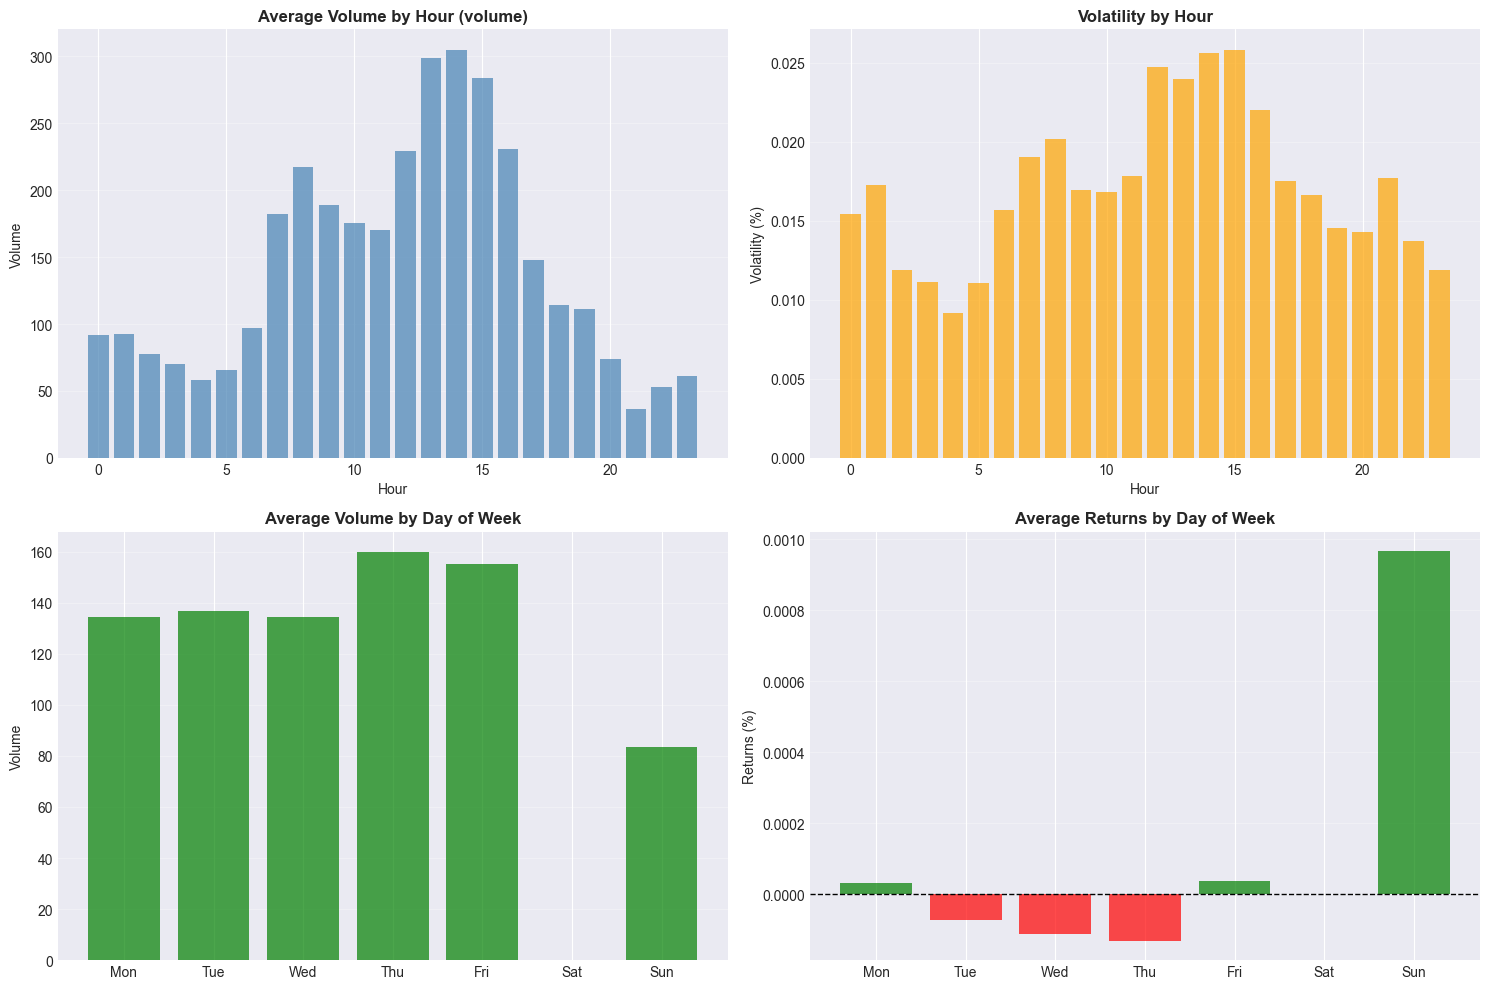

In [18]:
# Visualize hourly patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Determine volume column
volume_col = 'tick_volume' if 'tick_volume' in df.columns else ('volume' if 'volume' in df.columns else None)

if volume_col:
    # Volume by hour
    hourly_volume_full = df.groupby('hour')[volume_col].mean()
    axes[0, 0].bar(hourly_volume_full.index, hourly_volume_full.values, color='steelblue', alpha=0.7)
    axes[0, 0].set_title(f'Average Volume by Hour ({volume_col})', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Hour')
    axes[0, 0].set_ylabel('Volume')
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Volume by day of week
    daily_volume = df.groupby('day_name')[volume_col].mean().reindex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    )
    axes[1, 0].bar(range(len(daily_volume)), daily_volume.values, color='green', alpha=0.7)
    axes[1, 0].set_xticks(range(len(daily_volume)))
    axes[1, 0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    axes[1, 0].set_title('Average Volume by Day of Week', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Volume')
    axes[1, 0].grid(True, alpha=0.3, axis='y')
else:
    # Use returns count as proxy
    hourly_count = df.groupby('hour')['returns'].count()
    axes[0, 0].bar(hourly_count.index, hourly_count.values, color='steelblue', alpha=0.7)
    axes[0, 0].set_title('Data Points by Hour', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Hour')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Data points by day of week
    daily_count = df.groupby('day_name')['returns'].count().reindex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    )
    axes[1, 0].bar(range(len(daily_count)), daily_count.values, color='green', alpha=0.7)
    axes[1, 0].set_xticks(range(len(daily_count)))
    axes[1, 0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    axes[1, 0].set_title('Data Points by Day of Week', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].grid(True, alpha=0.3, axis='y')

# Volatility by hour (always available)
hourly_volatility = df.groupby('hour')['returns'].std() * 100
axes[0, 1].bar(hourly_volatility.index, hourly_volatility.values, color='orange', alpha=0.7)
axes[0, 1].set_title('Volatility by Hour', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Volatility (%)')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Price change by day of week
daily_returns = df.groupby('day_name')['returns'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
) * 100
colors = ['red' if x < 0 else 'green' for x in daily_returns.values]
axes[1, 1].bar(range(len(daily_returns)), daily_returns.values, color=colors, alpha=0.7)
axes[1, 1].set_xticks(range(len(daily_returns)))
axes[1, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[1, 1].set_title('Average Returns by Day of Week', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Returns (%)')
axes[1, 1].axhline(0, color='black', linestyle='--', linewidth=1)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 🔍 10. Correlation Analysis


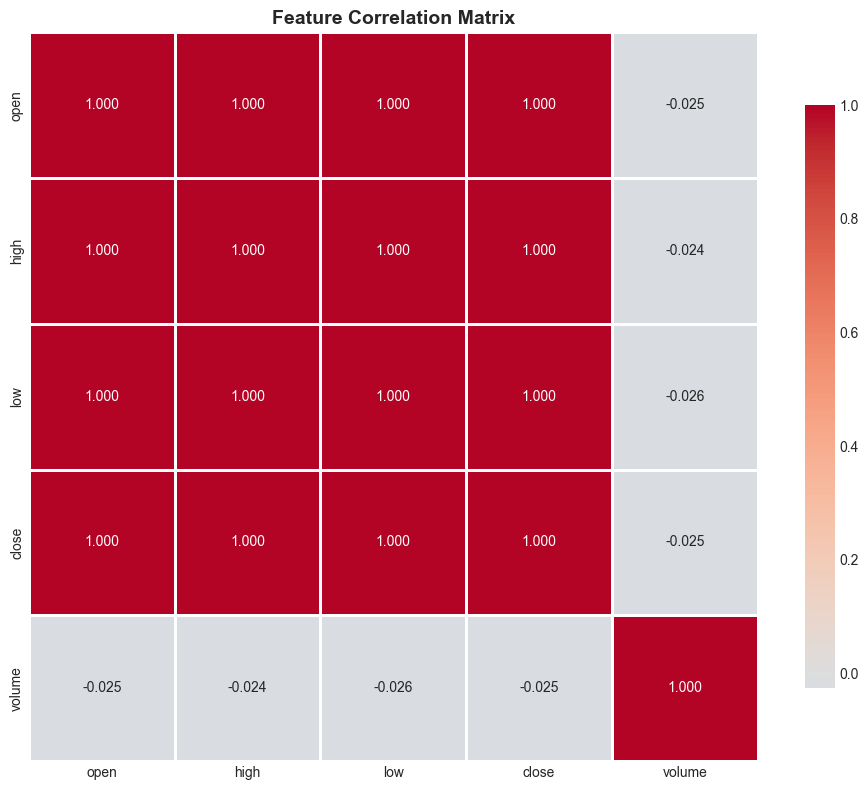


📊 Correlation Matrix:


,open,high,low,close,volume
open,1.000000,0.999947,0.999952,0.999924,-0.024864
high,0.999947,1.000000,0.999900,0.999954,-0.023644
low,0.999952,0.999900,1.000000,0.999953,-0.026161
close,0.999924,0.999954,0.999953,1.000000,-0.024913
volume,-0.024864,-0.023644,-0.026161,-0.024913,1.000000


In [22]:
# Calculate correlations
corr_features = ['open', 'high', 'low', 'close']

# Add volume column if exists
volume_col = 'tick_volume' if 'tick_volume' in df.columns else ('volume' if 'volume' in df.columns else None)
if volume_col:
    corr_features.append(volume_col)

# Add spread if exists
if 'spread' in df.columns:
    corr_features.append('spread')

correlation_matrix = df[corr_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Correlation Matrix:")
display(correlation_matrix)

## 🎯 11. Key Findings Summary


In [23]:
print("="*70)
print("🎯 KEY FINDINGS - EUR/USD DATA EXPLORATION")
print("="*70)

print(f"\n📊 DATASET OVERVIEW:")
print(f"  • Total Samples: {len(df):,}")
print(f"  • Date Range: {df.index.min()} to {df.index.max()}")
print(f"  • Duration: {(df.index.max() - df.index.min()).days} days")
print(f"  • Missing Values: {df.isnull().sum().sum()}")
print(f"  • Duplicates: {df.index.duplicated().sum()}")

print(f"\n💰 PRICE CHARACTERISTICS:")
print(f"  • Price Range: {df['close'].min():.5f} - {df['close'].max():.5f}")
print(f"  • Mean Price: {df['close'].mean():.5f}")
print(f"  • Volatility (std): {df['returns'].std() * 100:.4f}%")

print(f"\n📈 RETURNS ANALYSIS:")
print(f"  • Mean Return: {df['returns'].mean() * 100:.6f}%")
print(f"  • Return Std: {df['returns'].std() * 100:.4f}%")
print(f"  • Skewness: {df['returns'].skew():.4f}")
print(f"  • Kurtosis: {df['returns'].kurtosis():.4f} (heavy tails)")

print(f"\n⏰ TRADING PATTERNS:")
if 'hourly_volume' in dir():
    print(f"  • Most Active Hours: {hourly_volume.head(3).index.tolist()}")
    print(f"  • Least Active Hours: {hourly_volume.tail(3).index.tolist()}")
    print(f"  • Peak Activity Hour: {hourly_volume.idxmax()}:00")
else:
    print("  • Volume data not available")

print(f"\n✅ DATA QUALITY:")
if df.isnull().sum().sum() == 0 and df.index.duplicated().sum() == 0:
    print("  • ✅ Data is clean and ready for training!")
else:
    print("  • ⚠️  Data needs cleaning")

print(f"\n🎓 NEXT STEPS:")
print("  1. Feature Engineering (02_Feature_Engineering.ipynb)")
print("  2. Calculate 100+ technical indicators")
print("  3. Create training labels")
print("  4. Prepare sequences for deep learning")

print("\n" + "="*70)

🎯 KEY FINDINGS - EUR/USD DATA EXPLORATION

📊 DATASET OVERVIEW:
  • Total Samples: 100,000
  • Date Range: 2019-12-31 16:00:00+00:00 to 2020-04-08 04:20:00+00:00
  • Duration: 98 days
  • Missing Values: 2
  • Duplicates: 0

💰 PRICE CHARACTERISTICS:
  • Price Range: 1.06380 - 1.14833
  • Mean Price: 1.10175
  • Volatility (std): 0.0177%

📈 RETURNS ANALYSIS:
  • Mean Return: -0.000031%
  • Return Std: 0.0177%
  • Skewness: 1.0841
  • Kurtosis: 49.9820 (heavy tails)

⏰ TRADING PATTERNS:
  • Most Active Hours: [14, 13, 15]
  • Least Active Hours: [4, 22, 21]
  • Peak Activity Hour: 14:00

✅ DATA QUALITY:
  • ⚠️  Data needs cleaning

🎓 NEXT STEPS:
  1. Feature Engineering (02_Feature_Engineering.ipynb)
  2. Calculate 100+ technical indicators
  3. Create training labels
  4. Prepare sequences for deep learning



## 💾 12. Save Exploration Results


In [24]:
# Save summary statistics
summary = {
    'dataset': 'EUR_USD_1min',
    'samples': len(df),
    'date_range': f"{df.index.min()} to {df.index.max()}",
    'duration_days': (df.index.max() - df.index.min()).days,
    'price_min': float(df['close'].min()),
    'price_max': float(df['close'].max()),
    'price_mean': float(df['close'].mean()),
    'returns_mean': float(df['returns'].mean()),
    'returns_std': float(df['returns'].std()),
    'skewness': float(df['returns'].skew()),
    'kurtosis': float(df['returns'].kurtosis()),
    'missing_values': int(df.isnull().sum().sum()),
    'duplicates': int(df.index.duplicated().sum())
}

import json
Path('../data').mkdir(exist_ok=True)
with open('../data/exploration_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

print("✅ Exploration summary saved to: ../data/exploration_summary.json")
print("\n🎉 Data exploration complete! Ready for feature engineering.")

✅ Exploration summary saved to: ../data/exploration_summary.json

🎉 Data exploration complete! Ready for feature engineering.


---

## ✅ Exploration Complete!

**Next Notebook:** `02_Feature_Engineering.ipynb`

**Key Takeaways:**
- ✅ Data is clean with no missing values
- ✅ Returns show heavy tails (kurtosis > 3)
- ✅ Clear hourly trading patterns identified
- ✅ Ready for feature engineering phase

---
